In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import os
import matplotlib.pyplot as plt
import json

# Data cleaning

In [25]:


foldernames = [
    './TRAININGS/items-07_07_2022__19:58:42',
    './HUMANS',
]
filenames = ['/results.csv', '/cushman.csv']
labels = ['gpt', 'human']
dfs = []
dfs_with_unclear = []

dataset = json.load(open('data/cushman_2006/items.json'))
dataset = pd.DataFrame(dataset)
for label, foldername, fname in zip(labels, foldernames, filenames):
    df = pd.read_csv(open(foldername+fname, 'r'))
    print(df)
    df['exp'] = label
    if 'answer' in df.columns:
        df['a'] = df['answer']
    df['a'] = df['a'].str.lower()
    df = df[df['q_id']==0]
    df = df[~df['item_id'].isin([1, 2])]
    for i in df['item_id'].unique():
        if i not in (1, 2):

            df.loc[df['item_id']==i, 'title'] = \
                str(dataset[dataset['id']==i]['title'].unique()[0])[2:]
            df.loc[df['item_id']==i, 'cond'] = \
                str(dataset[dataset['id']==i]['title'].unique()[0])[:2]

    df['principle'] = ''
    df['principle'] = df['principle'].astype('object')
    df.loc[df['cond'].str.contains('ik|ci|fk|cf'), 'principle'] += ' action '
    df.loc[df['cond'].str.contains('l'), 'principle'] += ' inaction '
    df.loc[df['cond'].str.contains('f'), 'principle'] += ' foreseen '
    df.loc[df['cond'].str.contains('i'), 'principle'] += ' intended '
    df.loc[df['cond'].str.contains('c'), 'principle'] += ' contact '
    df.loc[~df['cond'].str.contains('c'), 'principle'] += ' no_contact '
    df['yes'] = df['a'].str.contains(pat=r'\b(yes)\b', regex=True)
    df['no'] = df['a'].str.contains(pat=r'\b(no)\b', regex=True)
    df['unclear'] = df['yes'] == df['no']
    df['val'] = None
    df.loc[df['yes']==1, 'val'] = 'yes'
    df.loc[df['no']==1, 'val'] = 'no'
    df.loc[df['unclear']==1, 'val'] = 'unclear'
    dfs_with_unclear.append(df.copy())
    df = df[df['unclear']!=1] 
    dfs.append(df.copy())
    
df = pd.concat(dfs)
df_with_unclear = pd.concat(dfs_with_unclear)

def mean_by_exp_and_sub(df):
    # set cond label and merge 
    exp = df['exp'].unique()
    dfs = []
    for e in exp:
        d = df[df['exp']==e].groupby(['title', 'principle' ], as_index=False).mean()
        d['exp'] = e
        dfs.append(d.copy())

    df2 = pd.concat(dfs)
    return df2

df2 = mean_by_exp_and_sub(df)
df2_with_unclear = mean_by_exp_and_sub(df_with_unclear)

    
df[df['val']=='unclear'].to_excel(foldername[0] + '/unclear.xlsx')

print('unclear proportion: ', np.mean(df_with_unclear[df_with_unclear.exp=='human']['unclear']==1))

df2


      Unnamed: 0  item_id                                           question  \
0              0        1  Adam is driving his motorboat when he notices ...   
1              1        1                                               Why?   
2              2        1  Adam is driving his motorboat when he notices ...   
3              3        1                                               Why?   
4              4        1  Adam is driving his motorboat when he notices ...   
...          ...      ...                                                ...   
1275        1275       32                                               Why?   
1276        1276       32  Casey is drifting along in his motorboat near ...   
1277        1277       32                                               Why?   
1278        1278       32  Casey is drifting along in his motorboat near ...   
1279        1279       32                                               Why?   

      q_id  iter  a_id                 

/tmp/ipykernel_248339/1667682733.py:37: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['yes'] = df['a'].str.contains(pat=r'\b(yes)\b', regex=True)
/tmp/ipykernel_248339/1667682733.py:38: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['no'] = df['a'].str.contains(pat=r'\b(no)\b', regex=True)
/tmp/ipykernel_248339/1667682733.py:37: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['yes'] = df['a'].str.contains(pat=r'\b(yes)\b', regex=True)
/tmp/ipykernel_248339/1667682733.py:38: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['no'] = df['a'].str.contains(pat=r'\b(no)\b', regex=True)


,title,principle,Unnamed: 0,item_id,q_id,iter,a_id,yes,no,unclear,item_idx,rt,exp
0,Aqua,action foreseen contact,98.875000,3.0,0.0,9.437500,0.0,1.000000,0.000000,0.0,NaN,NaN,gpt
1,Aqua,action foreseen no_contact,140.941176,4.0,0.0,10.470588,0.0,1.000000,0.000000,0.0,NaN,NaN,gpt
2,Boat,action foreseen no_contact,977.647059,25.0,0.0,8.823529,0.0,1.000000,0.000000,0.0,NaN,NaN,gpt
3,Boat,inaction foreseen no_contact,1021.000000,26.0,0.0,10.500000,0.0,0.375000,0.625000,0.0,NaN,NaN,gpt
4,Boxcar,action foreseen no_contact,180.470588,5.0,0.0,10.235294,0.0,1.000000,0.000000,0.0,NaN,NaN,gpt
5,Boxcar,action intended contact,259.764706,7.0,0.0,9.882353,0.0,0.882353,0.117647,0.0,NaN,NaN,gpt
6,Boxcar,action intended no_contact,218.235294,6.0,0.0,9.117647,0.0,1.000000,0.000000,0.0,NaN,NaN,gpt
7,Boxcar,inaction intended no_contact,297.875000,8.0,0.0,8.937500,0.0,0.625000,0.375000,0.0,NaN,NaN,gpt
8,Burn,action foreseen contact,699.000000,18.0,0.0,9.500000,0.0,1.000000,0.000000,0.0,NaN,NaN,gpt
9,Burn,action foreseen no_contact,619.000000,16.0,0.0,9.500000,0.0,1.000000,0.000000,0.0,NaN,NaN,gpt


# Fig 1

In [3]:
#d = []
#pairs = [('action', 'inaction'), ('intended', 'foreseen'), ('contact', 'no_contact')]
#labels = ('action', 'intention', 'contact')
#titles = [
#    ('Boxcar', 'Pond', 'Ship', 'Car', 'Boat', 'Switch'),
#    ('Speed', 'Burn', 'Boxcar', 'Switch', 'Chem', 'Shark'),
#    ('Speed', 'Boxcar', 'Aqua', 'Rubble')
#]
#for p,l,t1 in zip(pairs, labels, titles):
#    for t in t1:
#        d.append({
#            'principle': p[0],
#            'item': t,
#            'yes': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[0] + ' ')), 'yes'].mean()
#        })
#        d.append({
#               'principle': p[1],
#               'item': t,
#               'yes': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[1] + ' ')), 'yes'].mean()
#        })
#
#
#new_df = pd.DataFrame(d)
#new_df
#
#d = []
#
#for p,l,t1 in zip(pairs, labels, titles):
#    for t in t1:
#        d.append(
#            {
#                'principle': p[0],    
#                'item': t,
#                'replicates': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[1] + ' ')), 'yes'].mean() >\
#                            df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[0] + ' ')), 'yes'].mean()
#
#            }
#        )
#df_table = pd.DataFrame(d)
#df_table.loc[df_table['principle'] == 'intended', 'principle'] = 'intention'
#print(df_table)
#
#
df2 = df
dv = 'yes'
d = []
pairs = [('action', 'inaction'), ('intended', 'foreseen'), ('contact', 'no_contact')]
labels = ('action', 'intention', 'contact')
titles = [
    ('Boxcar', 'Pond', 'Ship', 'Car', 'Boat', 'Switch'),
    ('Speed', 'Burn', 'Boxcar', 'Switch', 'Chem', 'Shark'),
    ('Speed', 'Boxcar', 'Aqua', 'Rubble')
]
for p,l,t1 in zip(pairs, labels, titles):
    for e in ['gpt', 'human']:
        df2 = df[df['exp']==e]

        if e == 'gpt':
            key = 'iter'
            sub = df['iter'].unique()
        else:
            key = 'prolific_id'
            sub = df['prolific_id'].unique()


        for t in t1:
            for i in sub:
                if i in ['nan', np.NaN, 'notfound']:
                    continue


                d.append({
                    'principle': p[0],
                    'item': t,
                    'val': df2.loc[(df2[key] == i) * (df2['title'] == t) * (df2['principle'].str.contains(' ' + p[0] + ' ')), dv].mean(),
                    'meta_principle': l,
                    key: i,
                    'exp': e,
                })
                d.append({
                       'principle': p[1],
                       'item': t,
                       'val': df2.loc[(df2[key]==i) * (df2['title'] == t) * (df2['principle'].str.contains(' ' + p[1] + ' ')), dv].mean(),
                       'meta_principle': l,
                       key: i,
                        'exp': e,
                })


new_df = pd.DataFrame(d)

d = []

for p,l,t1 in zip(pairs, labels, titles):
    for e in ['gpt', 'human']:
        df2 = df[df['exp']==e]


        for t in t1:
            d.append(
                {
                    'principle': p[0],    
                    'item': t,
                    'replicates': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[1] + ' ')), dv].mean() >\
                                df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[0] + ' ')), dv].mean(),
                                'exp': e,

                }
            )
df_table = pd.DataFrame(d)
df_table.loc[df_table['principle'] == 'intended', 'principle'] = 'intention'
print(df_table)
print(new_df)

    principle    item  replicates    exp
0      action  Boxcar       False    gpt
1      action    Pond       False    gpt
2      action    Ship       False    gpt
3      action     Car       False    gpt
4      action    Boat       False    gpt
5      action  Switch       False    gpt
6      action  Boxcar       False  human
7      action    Pond        True  human
8      action    Ship        True  human
9      action     Car        True  human
10     action    Boat        True  human
11     action  Switch        True  human
12  intention   Speed        True    gpt
13  intention    Burn        True    gpt
14  intention  Boxcar        True    gpt
15  intention  Switch        True    gpt
16  intention    Chem       False    gpt
17  intention   Shark        True    gpt
18  intention   Speed        True  human
19  intention    Burn        True  human
20  intention  Boxcar        True  human
21  intention  Switch        True  human
22  intention    Chem       False  human
23  intention   

# Fig 1

/tmp/ipykernel_248339/4287310079.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pg.ttest(x=df3[df3.principle_variation=='yes'][df3.meta_principle=='contact']['val'], y=df3[df3.principle_variation=='no'][df3.meta_principle=='contact']['val'], paired=True)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.671491,29,two-sided,0.012256,"[-0.25, -0.03]",0.377193,3.793,0.514945


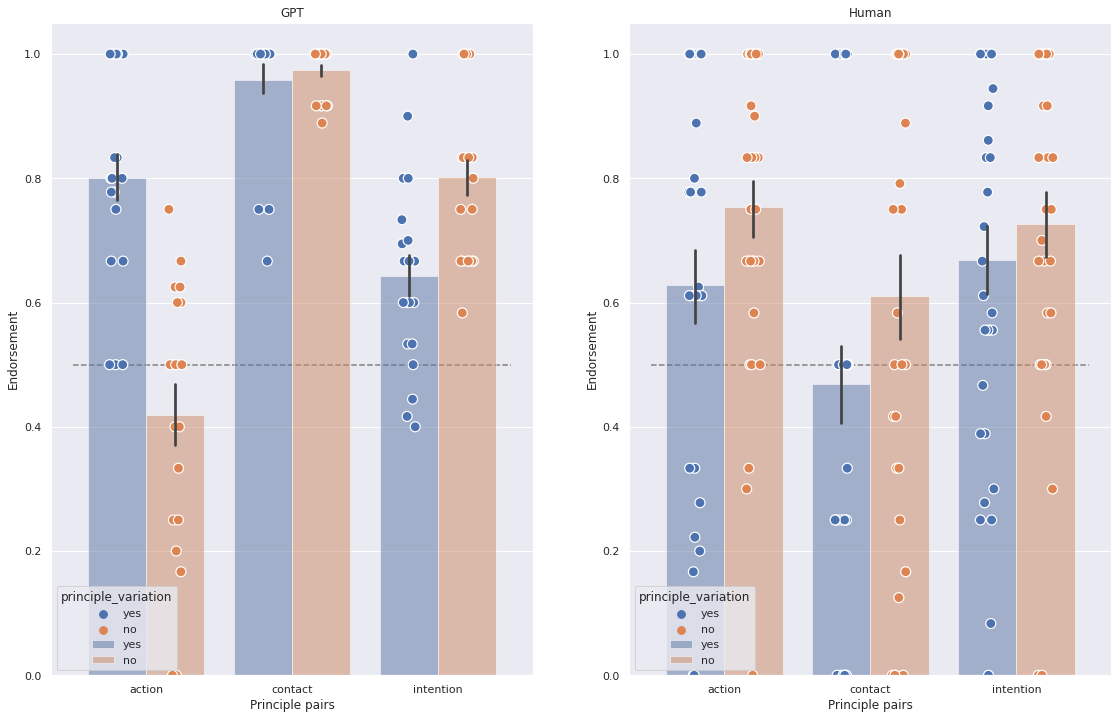

In [37]:
sns.set(rc={'figure.figsize':(19, 12)})

plt.subplot(1, 2, 1)
df3 = new_df[new_df.exp=='gpt'].groupby(['principle', 'iter', 'meta_principle'], as_index=False).mean()
df3['principle_variation'] = 'yes'
df3.loc[df3['principle'].isin(['no_contact', 'foreseen', 'inaction']), 'principle_variation'] = 'no'
sns.stripplot(x='meta_principle', y='val', hue='principle_variation', data=df3, size=10, linewidth=1.2, zorder=2, edgecolor='white', dodge=True)
sns.barplot(x='meta_principle', y='val', hue='principle_variation', data=df3, alpha=.5, zorder=1, ci=68, dodge=True)
# raincloud(x='exp', y='yes', markersize=9, df=df2)
x_lim = plt.gca().get_xlim()
plt.plot(x_lim, [.5, .5], ls='--', color='gray', zorder=0)
# plt.ylim(0.5,1.5)
plt.xlabel('Principle pairs')
plt.ylabel('Endorsement')
plt.title('GPT')


plt.subplot(1, 2, 2)
df3 = new_df[new_df.exp=='human'].groupby(['principle', 'prolific_id', 'meta_principle'], as_index=False).mean()
df3['principle_variation'] = 'yes'
df3.loc[df3['principle'].isin(['no_contact', 'foreseen', 'inaction']), 'principle_variation'] = 'no'
sns.stripplot(x='meta_principle', y='val', hue='principle_variation', data=df3, size=10, linewidth=1.2, zorder=2, edgecolor='white', dodge=True)
sns.barplot(x='meta_principle', y='val', hue='principle_variation', ci=68,data=df3, alpha=.5, zorder=1, dodge=True)
# raincloud(x='exp', y='yes', markersize=9, df=df2)
x_lim = plt.gca().get_xlim()
plt.plot(x_lim, [.5, .5], ls='--', color='gray', zorder=0)
# plt.ylim(0.5,1.5)
plt.xlabel('Principle pairs')
plt.ylabel('Endorsement')
plt.title('Human')

df3 = new_df[new_df.exp=='human'].groupby(['principle', 'prolific_id', 'meta_principle'], as_index=False).mean()
df3['principle_variation'] = 'yes'
df3.loc[df3['principle'].isin(['no_contact', 'foreseen', 'inaction']), 'principle_variation'] = 'no'

pg.ttest(x=df3[df3.principle_variation=='yes'][df3.meta_principle=='contact']['val'], y=df3[df3.principle_variation=='no'][df3.meta_principle=='contact']['val'], paired=True)


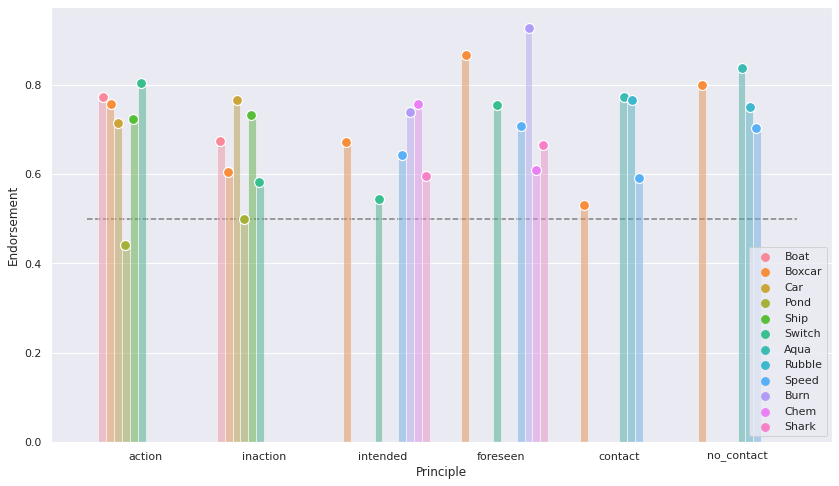

In [8]:
sns.set(rc={'figure.figsize':(14, 8)})

order = ['action', 'inaction', 'intended', 'foreseen', 'contact', 'no_contact']
df3 = new_df.groupby(['principle', 'item'], as_index=False).mean()

sns.stripplot(x='principle', y='val', hue='item', data=df3,
    size=10, linewidth=1.2, zorder=2, edgecolor='white', dodge=True, order=order)

g = sns.barplot(x='principle', y='val', hue='item', data=df3,
    alpha=.5, zorder=1, ci=68, dodge=True, order=order,)

# s.legend_.show()
# raincloud(x='exp', y='yes', markersize=9, df=df2)
x_lim = plt.gca().get_xlim()
plt.plot(x_lim, [.5, .5], ls='--', color='gray', zorder=0)
# plt.ylim(0.5,7.5)
plt.xlabel('Principle')
plt.ylabel('Endorsement')

h, l = g.get_legend_handles_labels()
plt.legend(h[:12], l[:12], loc='lower right')


In [7]:

def f(s, v, props): return np.where(s.isin([v]), props, '')
s = df_table.style
df_table1 = df_table[df_table['exp'] == 'human']
df_table1.loc[df_table1['replicates']==True, 'replicates'] = '✅'
df_table1.loc[df_table1['replicates']==False, 'replicates'] = '❌'

df_table1
# s.apply(f, v=True, props="color: lightgreen;", axis=0)\
# .apply(f, v=False, props="color: white; background-color:pink", axis=0)
# df_table.style.apply(f, v=False, props="color:lightred;", axis=0)

/home/getz/PycharmProjects/CognitiveReflection/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,principle,item,replicates,exp
6,action,Boxcar,❌,human
7,action,Pond,✅,human
8,action,Ship,✅,human
9,action,Car,✅,human
10,action,Boat,✅,human
11,action,Switch,✅,human
18,intention,Speed,✅,human
19,intention,Burn,✅,human
20,intention,Boxcar,✅,human
21,intention,Switch,✅,human


In [23]:
ddd = df[(df.exp=='human') & (df.title=='Car')& (df.principle.str.contains('action'))]
